In [1]:
# Python
import numpy as np
import pandas as pd
import time

# Machine Learning
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest, f_regression

# RDKit
from rdkit.Chem import Descriptors
from rdkit.ML.Descriptors import MoleculeDescriptors
from rdkit.Chem import rdMolDescriptors
from rdkit.Chem import AllChem
from rdkit import Chem
from rdkit.Chem import Descriptors
from rdkit.ML.Descriptors import MoleculeDescriptors
from rdkit import DataStructs

In [25]:
from rdkit.Chem import rdFMCS
from rdkit.Chem import rdRascalMCES

ImportError: cannot import name 'rdRascalMCES' from 'rdkit.Chem' (C:\ProgramData\anaconda3\Lib\site-packages\rdkit\Chem\__init__.py)

In [17]:
mol1 = Chem.MolFromSmarts('[#6]1-*-[#6]-[#6]2-[#6]-[#6]-2-*-1')
mol2 = Chem.MolFromSmarts('*-[#6](-*)-[#6]1-[#6]-[#6]-[#6]-[#6]-[#6]-1')

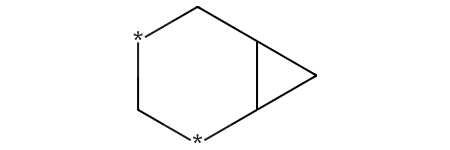

In [19]:
mol1

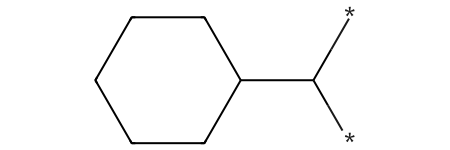

In [20]:
mol2

In [21]:
mols = (mol1, mol2)

In [22]:
rdFMCS.FindMCS(mols, atomCompare=rdFMCS.AtomCompare.CompareAny).smartsString

'[#6]1-[#0,#6]-[#6]-[#6](-[#6]-[#0,#6]-1)-[#6]'

In [24]:
results = rdRascalMCES.FindMCES(mol1, mol2)
#results = rdRascalMCES.FindMCES(mol1, mol2, opts)

NameError: name 'rdRascalMCES' is not defined

In [28]:
from rdkit import DataStructs
from rdkit.Chem import AllChem
fpgen = AllChem.GetMorganGenerator(radius=2)
fps = [fpgen.GetFingerprint(x) for x in ms]
DataStructs.TanimotoSimilarity(fps[0],fps[1])

AttributeError: module 'rdkit.Chem.AllChem' has no attribute 'GetMorganGenerator'

In [29]:
from rdkit.Chem import MACCSkeys
ms = [Chem.MolFromSmiles('CCOC'), Chem.MolFromSmiles('CCO'),
Chem.MolFromSmiles('COC')]
fps = [MACCSkeys.GenMACCSKeys(x) for x in ms]

In [30]:
DataStructs.TanimotoSimilarity(fps[0],fps[1])

0.5

In [31]:
mol1 = Chem.MolFromSmarts('[#6]1-*-[#6]-[#6]2-[#6]-[#6]-2-*-1')
mol2 = Chem.MolFromSmarts('*-[#6](-*)-[#6]1-[#6]-[#6]-[#6]-[#6]-[#6]-1')
mols = (mol1, mol2)

fps = [MACCSkeys.GenMACCSKeys(x) for x in mols]
DataStructs.TanimotoSimilarity(fps[0],fps[1])

[19:10:51] 

****
Pre-condition Violation
getNumImplicitHs() called without preceding call to calcImplicitValence()
Violation occurred on line 299 in file C:\rdkit\build\temp.win-amd64-cpython-311\Release\rdkit\Code\GraphMol\Atom.cpp
Failed Expression: d_implicitValence > -1
****



RuntimeError: Pre-condition Violation
	getNumImplicitHs() called without preceding call to calcImplicitValence()
	Violation occurred on line 299 in file Code\GraphMol\Atom.cpp
	Failed Expression: d_implicitValence > -1
	RDKIT: 2022.09.5
	BOOST: 1_78


In [32]:
from rdkit import Chem
from rdkit.Chem import AllChem
bitinfo = {}
AllChem.GetMorganFingerprintAsBitVect(Chem.MolFromSmiles(Chem.CanonSmiles('C1C2CCC3(CCO3)C12')), 2, bitInfo=bitinfo)
print(bitinfo[926])
print(80 in bitinfo)

bitinfo = {}
AllChem.GetMorganFingerprintAsBitVect(Chem.MolFromSmiles(Chem.CanonSmiles('OCCC1NC12COC2')),2, bitInfo=bitinfo)
print(bitinfo[926])
print(bitinfo[80])

((0, 0), (1, 0), (3, 0), (4, 0), (6, 0))
False
((6, 0), (8, 0))
((1, 0), (2, 0))


In [33]:
m = Chem.MolFromSmiles('Cc1ccccc1')
fp = rdMolDescriptors.GetMorganFingerprint(m,2)
fp.GetNonzeroElements()

{98513984: 3,
 422715066: 1,
 908339072: 1,
 951226070: 2,
 2246728737: 1,
 2763854213: 1,
 3207567135: 1,
 3217380708: 1,
 3218693969: 5,
 3999906991: 2,
 4244175903: 2}